In [1]:
from hw4_utils import *

In [2]:
#df = get_gaia_two_body_orbit_cat(processed=False,show=True,random=True,load_data=False)

#get_cross_match_cat()

In [3]:
rm_cols =['solution_id', 'source_id', 'nss_solution_type', 'ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'a_thiele_innes',
       'a_thiele_innes_error', 'b_thiele_innes', 'b_thiele_innes_error',
       'f_thiele_innes', 'f_thiele_innes_error', 'g_thiele_innes',
       'g_thiele_innes_error', 'c_thiele_innes', 'c_thiele_innes_error',
       'h_thiele_innes', 'h_thiele_innes_error', 'period', 'period_error',
       't_periastron', 't_periastron_error', 'eccentricity',
       'eccentricity_error','phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_flux_error',
       'phot_bp_mean_flux_error', 'phot_rp_mean_flux_error', 'bp_rp',
       'ag_gspphot', 'ebpminrp_gspphot','inclination',
       'inclination_error']

In [4]:
import pandas as pd
df = pd.read_csv('cross_match_table.csv')
new_df = clean_catalog(df)
new_df = new_df[rm_cols]

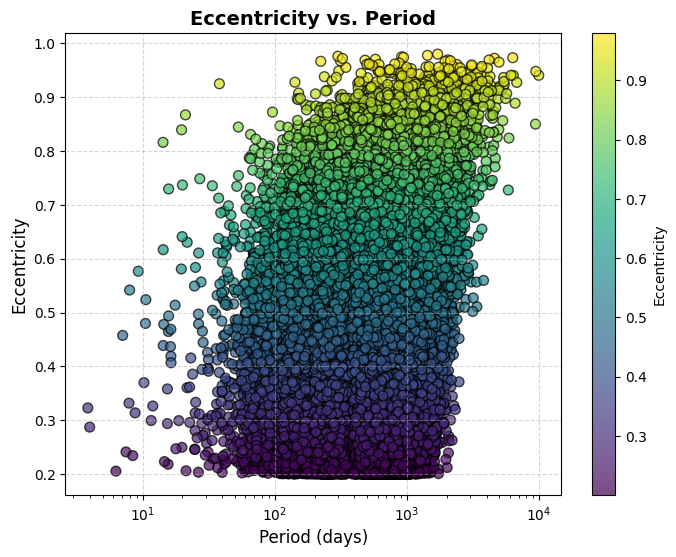

In [5]:
# Make a scatter plot of eccentricity vs. period
mask = new_df['eccentricity'] > 0.2

df1 = new_df[mask]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(df1['period'], df1['eccentricity'], 
            c=df1['eccentricity'], cmap='viridis',  # Color by period
            edgecolors='black', alpha=0.7, s=50)  # Add transparency & marker size

plt.colorbar(label='Eccentricity')  # Add color bar
plt.xlabel('Period (days)', fontsize=12)
plt.ylabel('Eccentricity', fontsize=12)
plt.xscale('log')  # Log scale for x-axis
plt.title('Eccentricity vs. Period', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)  # Add a light grid
plt.show()

In [6]:
df1['period'].describe()

count    121704.000000
mean        626.528671
std         347.600215
min           3.853976
25%         428.406714
50%         585.704471
75%         801.280599
max        9935.832615
Name: period, dtype: float64

In [7]:
cat_fit = get_fit_params(new_df,load_data=True)

In [8]:
cat_ext = get_extinction(cat=cat_fit,load_data=True)
print(len(cat_ext))
bad_col = ['i_fit_deg']
cat_ext = clean_catalog(cat_ext,col_list=bad_col)
print(len(cat_ext))


167248
167248


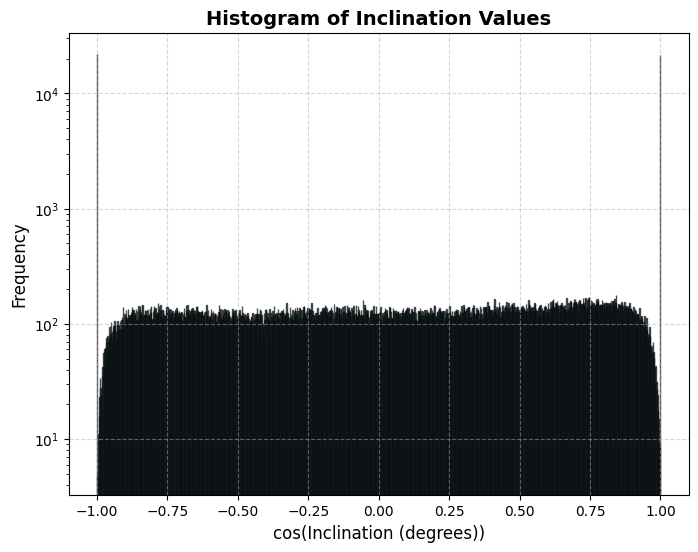

In [9]:
# Plot a histogram of the inclination values
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.hist(np.cos(np.deg2rad(np.asarray(cat_ext['i_fit_deg']))), bins=1000, color='skyblue', edgecolor='black', alpha=0.7)
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('cos(Inclination (degrees))', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Inclination Values', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)  # Add a light grid
plt.show()

In [10]:
#random_stars = get_gaia_two_body_orbit_cat(processed=False,show=True,random=True,load_data=True)
random_stars = pd.read_csv('random_stars.csv')  

In [11]:
random_stars = random_stars[random_stars['parallax'] > 0]
random_stars_ext = get_extinction(cat=random_stars,load_data=True,random_stars=True)


In [12]:
random_stars_ext

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,A_BP,A_G,A_RP,G_corr,BP-RB_corr
0,0,1636148068921376768,Gaia DR3 4267180339403392768,4267180339403392768,0,2016.0,286.716913,0.027857,0.276195,0.026506,...,1.0839,0.5603,0.5344,0.5836,PHOENIX,1.588339,1.148257,0.814403,14.095872,0.748192
1,1,1636148068921376768,Gaia DR3 5252403815119316480,5252403815119316480,1,2016.0,152.625068,1.344999,-64.267699,1.225396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1636148068921376768,Gaia DR3 1937745177867542656,1937745177867542656,2,2016.0,348.434982,0.425611,43.940704,0.494966,...,NaN,NaN,NaN,NaN,NaN,0.753600,0.544800,0.386400,19.986425,1.282084
3,3,1636148068921376768,Gaia DR3 5971301282285218048,5971301282285218048,3,2016.0,252.729717,0.783093,-37.917215,0.453547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1636148068921376768,Gaia DR3 6125916630291830144,6125916630291830144,6,2016.0,186.180736,0.152413,-50.756590,0.131493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122440,199990,1636148068921376768,Gaia DR3 5870300208559723264,5870300208559723264,199990,2016.0,203.025613,0.060461,-58.235031,0.074133,...,0.6748,0.3201,0.3056,0.3683,MARCS,NaN,NaN,NaN,NaN,NaN
122441,199991,1636148068921376768,Gaia DR3 6023037358812957056,6023037358812957056,199991,2016.0,245.075371,0.479704,-35.251026,0.310599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122442,199996,1636148068921376768,Gaia DR3 2020460402544193024,2020460402544193024,199996,2016.0,296.725637,0.164178,23.825141,0.193302,...,NaN,NaN,NaN,NaN,NaN,2.679624,1.937180,1.373947,17.358110,1.136529
122443,199997,1636148068921376768,Gaia DR3 5883762667601384064,5883762667601384064,199997,2016.0,231.280370,0.050825,-55.835921,0.061859,...,2.5366,1.3816,1.3779,1.3863,PHOENIX,NaN,NaN,NaN,NaN,NaN


In [13]:
face_on_df = cat_ext[((cat_ext['i_fit_deg'] < 5) & (cat_ext['i_fit_deg'] > 0) )|
                      ((cat_ext['i_fit_deg'] < 180) & (cat_ext['i_fit_deg'] > 175))]

In [14]:
edge_on_df = cat_ext[(cat_ext['i_fit_deg'] < 95) & (cat_ext['i_fit_deg'] > 85)]

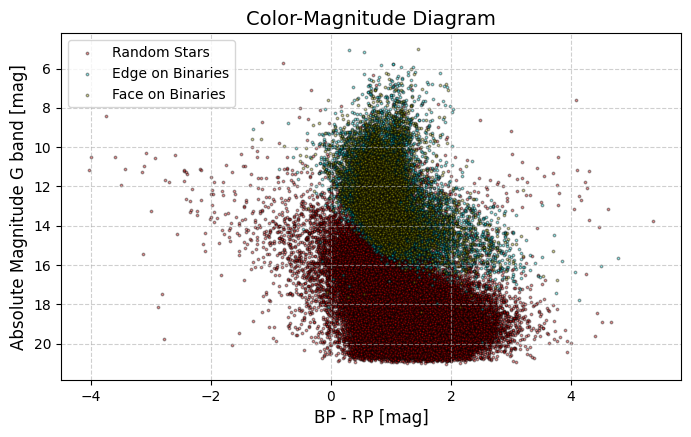

In [45]:
# Plot the cmd
labels = ['Random Stars','Edge on Binaries','Face on Binaries']
colors = ['red','cyan','y']
dfs = [random_stars_ext, face_on_df,edge_on_df]
fig,ax = plot_color_magnitude_diagram(dfs,
                             ssize=3,
                             colors=colors, 
                             labels=labels,
                             log_x=False,)


In [16]:
# Select the brightest edge-on binary with a period less than 60 days

edge_on_df = cat_ext[(cat_ext['i_fit_deg'] < 95) & (cat_ext['i_fit_deg'] > 85)]
low_period_stars = edge_on_df[(edge_on_df['period'] < 20)]

# Brightest star in G-maG
b_stars = low_period_stars[low_period_stars['G_corr'] < 12]
b_stars

,solution_id,source_id,nss_solution_type,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,...,inclination_error,a0_fit,omega_fit_deg,Omega_fit_deg,i_fit_deg,A_BP,A_G,A_RP,G_corr,BP-RB_corr
1786,4338096422163308545,577478114092768384,OrbitalTargetedSearch,136.267121,0.103460,2.834405,0.120427,42.054498,0.030741,-312.660301,...,NaN,0.825027,132.314292,-36.496762,92.379123,0.0,0.0,0.0,10.939681,2.253550
42347,4338096422163308545,2687733290513443840,OrbitalTargetedSearch,323.051538,0.090367,0.221830,0.037008,23.445184,0.025824,413.978878,...,NaN,0.626628,23.780411,57.483985,85.986560,0.0,0.0,0.0,9.351069,1.268836
49445,4338096422163308545,5086152743542494592,OrbitalTargetedSearchValidated,52.346398,0.011132,-24.100425,0.029369,32.158512,0.016725,222.660511,...,NaN,-0.199640,46.498840,11.096705,86.599636,0.0,0.0,0.0,8.810677,1.422422


In [17]:
from astroquery.mast import Catalogs, Observations
import lightkurve as lk

In [18]:
b_star = b_stars.iloc[2]
b_star.period

np.float64(3.9784726929381353)

In [19]:
gaia_source_id = b_star['source_id']
# Query the TESS Input Catalog (TIC) to find the TIC ID
tic_results = Catalogs.query_criteria(catalog="TIC", Gaia=gaia_source_id)

if len(tic_results) == 0:
    print(f"Gaia Source {gaia_source_id} is not in the TESS Input Catalog (TIC).")
else:
    tic_id = tic_results[0]["ID"]
    print(f"TIC ID for Gaia Source {gaia_source_id}: {tic_id}")

TIC ID for Gaia Source 5086152743542494592: 144539611


In [20]:
ra = b_star['ra']
dec = b_star['dec']

# Create a SkyCoord object
coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg,frame='icrs')
coords
# Query for observations within 0.1 degrees
obs_nearby = Observations.query_region(coords, radius="0.01 deg")

# Filter for TESS time-series data (light curves)
obs_tess = obs_nearby[obs_nearby['obs_collection'] == 'TESS']

if len(obs_nearby) == 0:
    print("No TESS observations found near the given coordinates.")
else:
    print(f"Found {len(obs_nearby)} TESS observations near the given coordinates.")

Found 112 TESS observations near the given coordinates.


In [21]:
# Convert astropy table to pandas DataFrame
obs_df = obs_nearby.to_pandas()

In [22]:
obs_df

,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0004-2-3,...,NaN,4,POLYGON 57.153484 -10.173491 62.184244 -20.588...,NaN,NaN,PUBLIC,False,NaN,61132369,0.0
1,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0031-2-4,...,NaN,31,POLYGON 48.86993800 -13.03877600 52.74883900 -...,NaN,NaN,PUBLIC,False,NaN,28131764,0.0
2,science,TESS,SPOC,Photometer,TESS,TESS,Optical,144539611,NaN,tess2018292075959-s0004-0000000144539611-0124-s,...,NaN,4,CIRCLE 52.34531326 -24.10086022 0.00138889,NaN,mast:TESS/product/tess2018292075959-s0004-0000...,PUBLIC,False,NaN,61110322,0.0
3,science,SWIFT,NaN,UVOT,NaN,B,OPTICAL,ASASSN-18da,NaN,00010582003,...,NaN,<NA>,POLYGON 52.173423 -23.745438 52.16632353486672...,http://archive.stsci.edu/cgi-bin/hla/fitscut.c...,NaN,PUBLIC,NaN,NaN,1620513,0.0
4,science,SWIFT,NaN,UVOT,NaN,U,OPTICAL,ASASSN-18da,NaN,00010582003,...,NaN,<NA>,POLYGON 52.174364 -23.745671 52.16695210812726...,http://archive.stsci.edu/cgi-bin/hla/fitscut.c...,NaN,PUBLIC,NaN,NaN,1620514,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,science,HLSP,TESS-SPOC,Photometer,TESS,TESS,Optical,144539611,NaN,hlsp_tess-spoc_tess_phot_0000000144539611-s000...,...,NaN,4,CIRCLE ICRS 52.34531326 -24.10086022 0.00111111,NaN,mast:HLSP/tess-spoc/s0004/target/0000/0001/445...,PUBLIC,False,NaN,60190116,0.0
108,science,HLSP,TGLC,Photometer,TESS,TESS,Optical,144539611,NaN,hlsp_tglc_tess_ffi_gaiaid-5086152743542494592-...,...,NaN,4,CIRCLE 52.3463977016284 -24.10042480667688 0.0...,NaN,mast:HLSP/tglc/s0004/cam2-ccd3/0050/8615/2743/...,PUBLIC,False,NaN,137092043,0.0
109,science,HLSP,TICA,Photometer,TESS,TESS,Optical,TICA FFI,NaN,hlsp_tica_s0031-cam2-ccd4,...,NaN,31,POLYGON 48.922262 -13.11317 52.749244 -24.3649...,NaN,NaN,PUBLIC,False,NaN,99355315,0.0
110,science,GALEX,AIS,GALEX,AIS,NUV,UV,AIS_489_1_22,NaN,6388120937060892672,...,AIS,<NA>,CIRCLE ICRS 52.24510008 -23.69090127 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,PUBLIC,NaN,5885.0,43144,0.0


In [23]:
# Query MAST for observations of this target
obs_table = Observations.query_criteria(target_name=tic_id, obs_collection="TESS")

# Get the Light Curve file(s)
data_products = Observations.get_product_list(obs_table)
light_curves = Observations.filter_products(data_products, productSubGroupDescription="LC", extension="fits")

# Download the light curve file(s)
downloaded_files = Observations.download_products(light_curves, mrp_only=True)


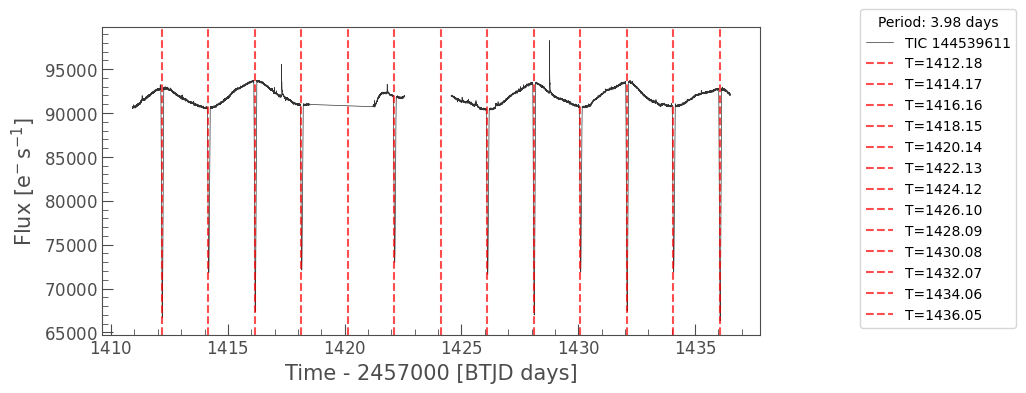

In [40]:
# Open the first downloaded light curve file using Lightkurve
lc = lk.read(downloaded_files['Local Path'][0])

event_times = np.arange(1412.18,1437,(b_star.period/2))

# Plot the limited time range light curve
lc.plot()

# Add vertical lines
for event in event_times:
    plt.axvline(event, color='red', linestyle='--', alpha=0.7, label=f'T={event:.2f}')

plt.legend(loc='lower right',bbox_to_anchor=(1.4, 0.0),title=f'Period: {b_star.period:.2f} days')

# Save the plot
plt.savefig('light_curve.png', dpi=300, bbox_inches='tight')

plt.show()

In [25]:
# Search for TESS light curves
obs_table = Observations.query_criteria_async(target_name=f"TIC {tic_id}", obs_collection="TESS")
data_products = Observations.get_product_list(obs_table)



TypeError: sequence item 0: expected str instance, Response found

In [ ]:
obs_table

In [ ]:
# Filter for light curve files
light_curve_files = Observations.filter_products(data_products, productType="timeseries", extension="fits")

# Download the light curve file
downloaded_files = Observations.download_products(light_curve_files[:1])  # Download first available file
file_path = downloaded_files["Local Path"][0]

In [ ]:
# Load the light curve
lc = lk.read(file_path)

# Plot the light curve
lc.plot(label=f"TIC {tic_id} Light Curve", ylabel="Flux")
plt.show()

In [ ]:
from astroquery.mast import Catalogs

gaia_source_id = "4525943082344640256"  # Replace with your Gaia Source ID

# Query the TESS Input Catalog (TIC) to find the TIC ID
tic_results = Catalogs.query_criteria(catalog="TIC", ID=gaia_source_id)

if len(tic_results) == 0:
    print(f"Gaia Source {gaia_source_id} is not in the TESS Input Catalog (TIC).")
else:
    tic_id = tic_results[0]["ID"]
    print(f"TIC ID for Gaia Source {gaia_source_id}: {tic_id}")


In [ ]:
def get_tic_stars(df):
    i = 0
    df = df.reset_index(drop=True)
    found = []
    while len(found) == 0 and i < len(df):
        # Query the TESS Input Catalog (TIC) to find the TIC ID
        print(f"Checking Gaia Source {df.iloc[i]['source_id']}")
        tic_results = Catalogs.query_criteria(catalog="TIC", Gaia=df.iloc[i]['source_id'])

        if len(tic_results) == 0:
            print(f"Gaia Source {df.iloc[i]['source_id']} is not in the TESS Input Catalog (TIC).")
            
        else:
            tic_id = tic_results[0]["ID"]
            found.append(df.iloc[i]['source_id'])
            print(f"TIC ID for Gaia Source {df.iloc[i]['source_id']}: {tic_id}")

        i = i+1
    return found

found = get_tic_stars(low_period_stars)

        


In [ ]:
found